# Data 606 Capstone: Fraud Detection in Financial Transactions, an Anamoly Detection Approach 

### Importing libraries necessary for the project.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_fscore_support

### Reading the data set and saving it into df.

In [2]:
file_path = '/Users/phani/Downloads/Financial_Dataset_Capstone.csv'
df = pd.read_csv(file_path)

In [3]:
df.shape

(6362620, 11)

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


* With the above function we can see the statistics of the given DataFrame particularly for the Numerical Features.
* It can help us identify potential outliers, understand the distribution of our data, and decide on appropriate data preprocessing steps or transformations.

In [6]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [7]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

# Exploratory Data Analysis

In [8]:
print('No. of duplicates are : ', df.duplicated().sum())

No. of duplicates are :  0


* From the above result, we can clearly say that the data set doesn't have any duplicates. There areno null values also.
* There is no need for the data cleaning step.

In [9]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

* Our data is highly imbalanced with 6.3m rows in Non-Fradulent category and 8213 observations only.

In [10]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

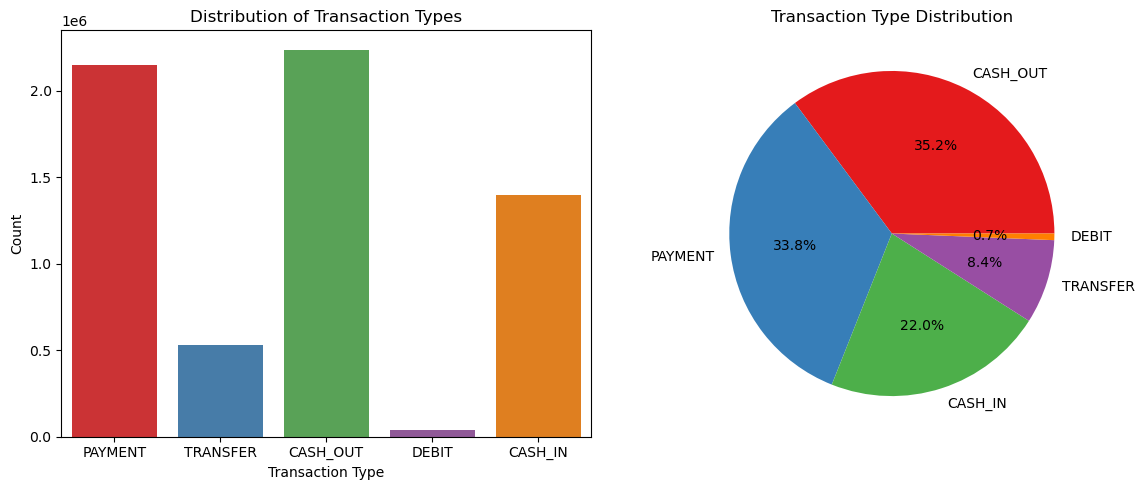

In [11]:
fraud_counts = df['isFraud'].value_counts()
transaction_type_counts = df['type'].value_counts()

# Create a new figure with 1 row and 3 columns of subplots
plt.figure(figsize=(12, 5))

# Subplot 1: Countplot for Transaction Types
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='type', palette='Set1')
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')

# Subplot 2: Pie Chart for Transaction Types
plt.subplot(1, 2, 2)
type_counts = df['type'].value_counts()
type_labels = type_counts.index
plt.pie(type_counts, labels=type_labels, autopct='%1.1f%%', colors=sns.color_palette('Set1'))
plt.title('Transaction Type Distribution')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

The data is highly imbalanced as the fraud transactions are just 1% when compare and our class variable contains data which is highly skewed towards the flag value 0, which would indeed affect any models we might train on this dataset.

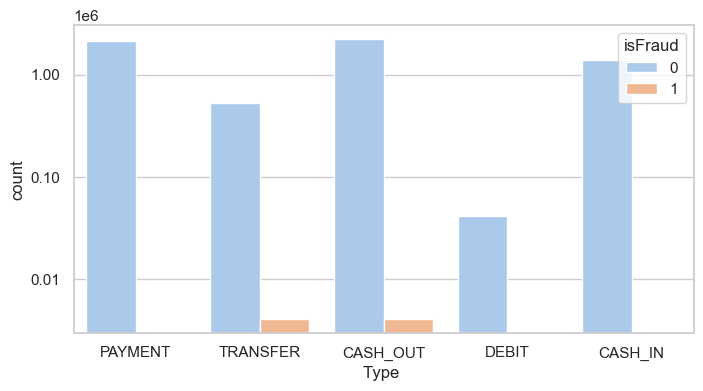

In [12]:
import matplotlib.ticker as mticker
def countplot_eda(df):
    sns.set_style('whitegrid')
    sns.set_context('notebook')
    plt.figure(figsize=(8, 4))
    counplot = sns.countplot(data=df, x='type', hue='isFraud',palette= "pastel")
    counplot.set_xlabel('Type ')
    counplot.set_ylabel(f'count')
    counplot.set_yscale('log')
    counplot.yaxis.set_major_formatter(mticker.ScalarFormatter())
    plt.show()

countplot_eda(df)

In [13]:
categories_to_remove = ['CASH_IN', 'PAYMENT', 'DEBIT']
old_df = df
df = df[~df['type'].isin(categories_to_remove)]

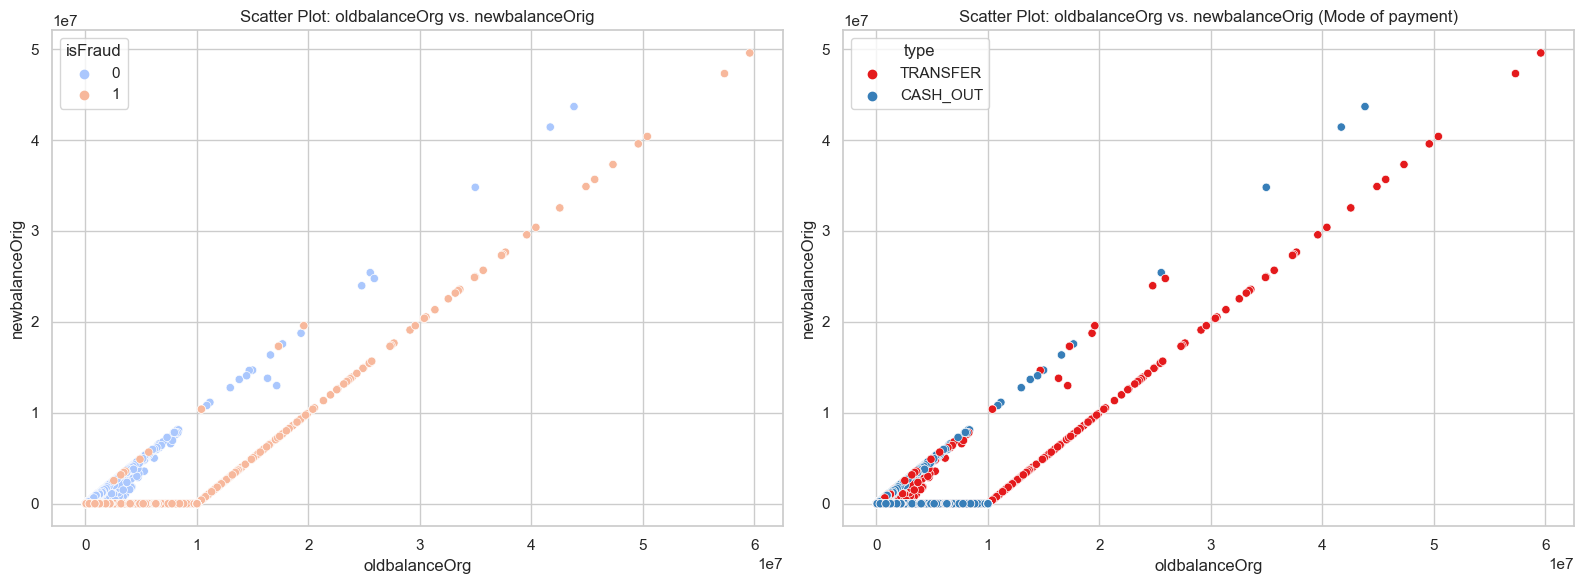

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# First subplot: Scatter plot for 'oldbalanceOrg' vs. 'newbalanceOrig' colored by 'isFraud'
sns.scatterplot(data=df, x='oldbalanceOrg', y='newbalanceOrig', hue='isFraud', palette='coolwarm', ax=axes[0])
axes[0].set_title('Plot ')
axes[0].set_title('Scatter Plot: oldbalanceOrg vs. newbalanceOrig')
axes[0].set_xlabel('oldbalanceOrg')
axes[0].set_ylabel('newbalanceOrig')

# Second subplot: Scatter plot for 'oldbalanceOrg' vs. 'newbalanceOrig' colored by 'type'
sns.scatterplot(data=df, x='oldbalanceOrg', y='newbalanceOrig', hue='type', palette='Set1', ax=axes[1])
axes[1].set_title('Scatter Plot: oldbalanceOrg vs. newbalanceOrig (Mode of payment)')
axes[1].set_xlabel('oldbalanceOrg')
axes[1].set_ylabel('newbalanceOrig')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

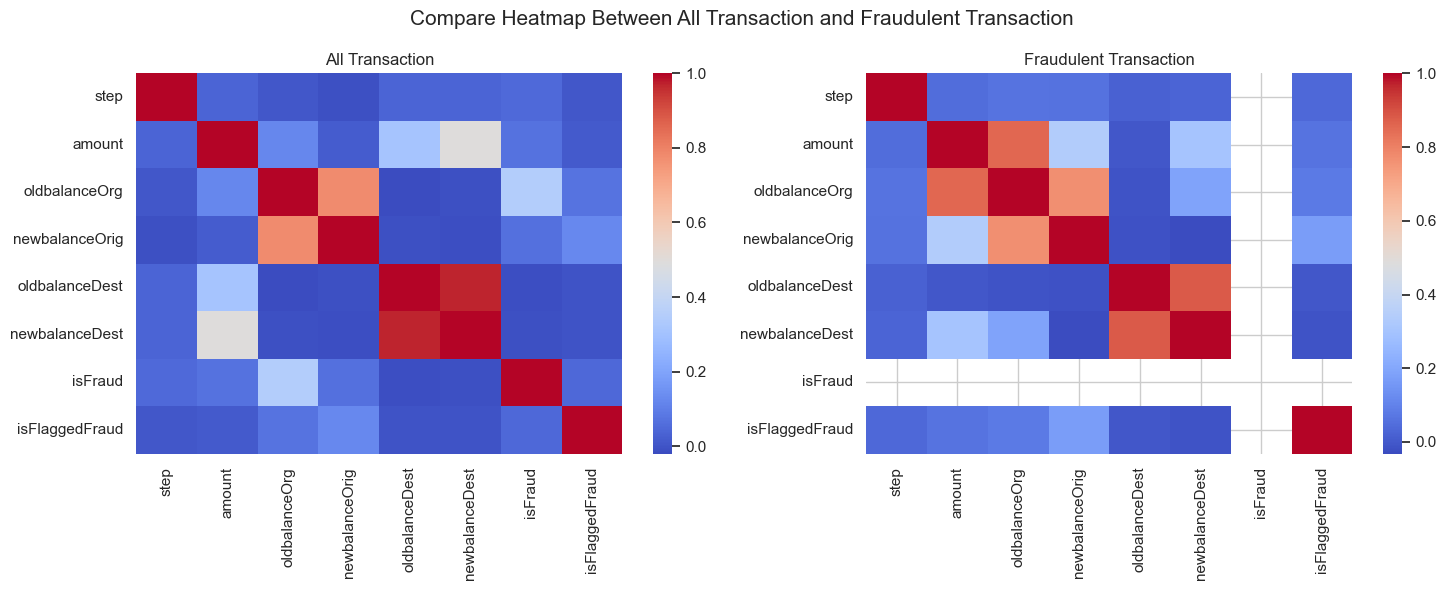

In [15]:
temp = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix for 'data' dataframe
corr_data = temp.corr()

# Compute the correlation matrix for 'fraudulent_transaction' dataframe
fraudulent_transaction = temp.loc[df['isFraud']==1]
corr_fraudulent = fraudulent_transaction.corr()

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Heatmap for 'data' dataframe
sns.heatmap(corr_data, annot=False, fmt=".2f", cmap='coolwarm', ax=ax[0])
ax[0].set_title("All Transaction", fontsize=12)

# Heatmap for 'fraudulent_transaction' dataframe
sns.heatmap(corr_fraudulent, annot=False, fmt=".2f", cmap='coolwarm', ax=ax[1])
ax[1].set_title("Fraudulent Transaction", fontsize=12)

fig.suptitle('Compare Heatmap Between All Transaction and Fraudulent Transaction', fontsize=15)

plt.tight_layout()
plt.show()

There's a notable correlation between 'amount' and 'oldbalanceOrg' that distinguishes between all transactions and fraudulent transactions. This is typical for fraud because criminals are likely intending to empty the target's account regardless of the savings balance.

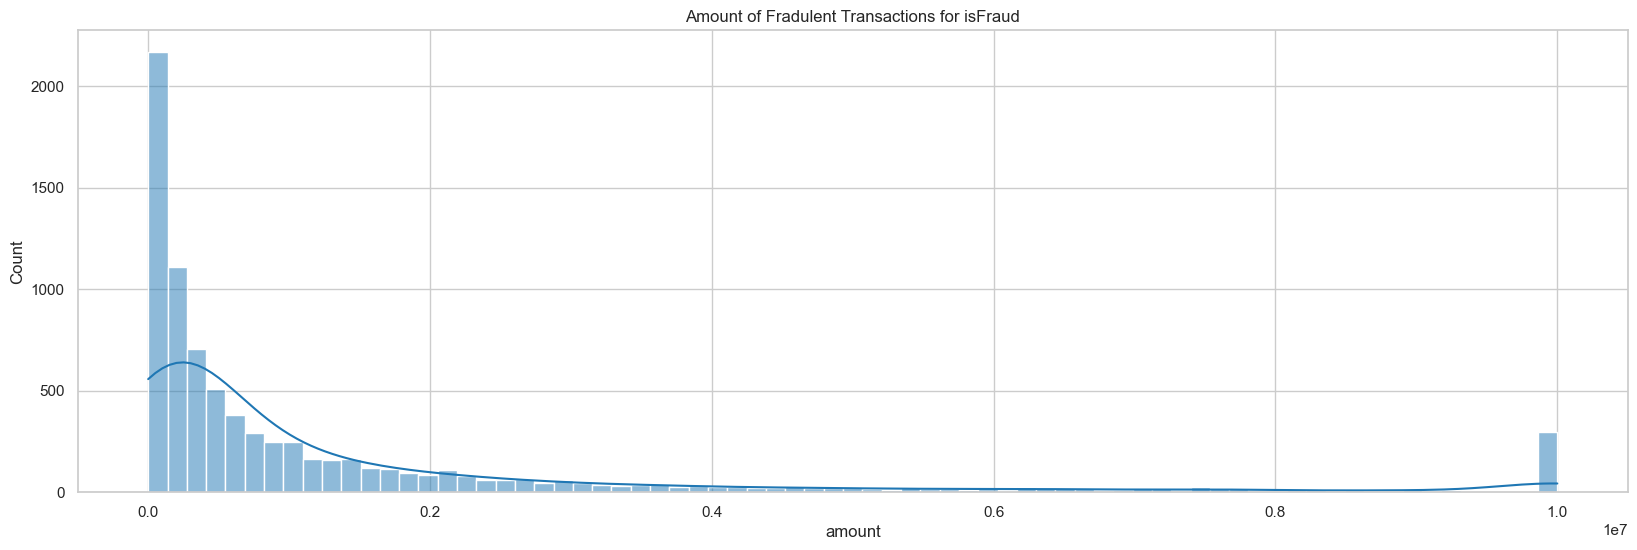

In [16]:
figure = plt.subplots(figsize = (20, 6))
ax = sns.histplot(data=df[df['isFraud']==1],x='amount', kde=True)
plt.title('Amount of Fradulent Transactions for isFraud')
plt.show()

* The distribution of the overall transaction amount is right-skewed, ranging between 0-10 million.
* The distribution of fraudulent transaction amounts is also right-skewed, ranging between 0-10 million, with a spike at 10 million. This suggests that all fraudulent transactions do not exceed 10 million per transfer. This might be due to reaching the maximum transfer limit of the bank.

# Data Preprocessing

* Before diving into model training, it's essential to preprocess the data to ensure it's in the right format for our machine learning algorithms. 
### In this section:

* We drop the unused columns.
* Convert data types for isFraud and isFlaggedFraud to boolean type.
* Encode the categorical columns using OneHotEncoder.
* Further divide the data into training and testing sets. Stratified sampling is used to ensure that both sets have a similar distribution of the target variable.

In [17]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [18]:
df = df.drop(['step', 'nameOrig', 'nameDest'], axis=1)

In [19]:
# covert data type of some columns
df['isFraud'] = df['isFraud'].astype(bool)
df['isFlaggedFraud'] = df['isFlaggedFraud'].astype(bool)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2770409 entries, 2 to 6362619
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            object 
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         bool   
 7   isFlaggedFraud  bool   
dtypes: bool(2), float64(5), object(1)
memory usage: 153.2+ MB



### OneHotEncoder
* If we Label Encoding categorical variable (in this case 'type') as integer e.g. (0,1,2,..) algorithms might assume an ordinal relationhsip between the categories. For example

* **PAYMENT = 0**
* **TRANSFER = 1**
* **CASH_OUT = 2**
* **DEBIT = 3**
* **CASH_IN = 4**
* This might lead the model to assume that DEBIT(3) somehow greater than TRANSFER(2), which doesn't make sense. OneHotEncoding avoids this problem.

In [20]:
# encoding categorical vaiables

encoder = OneHotEncoder(sparse_output=False)

# Reshape the 'type' column to 2D array for encoder
type_col = df['type'].values.reshape(-1, 1)

encoded_cols = encoder.fit_transform(type_col)

# Reset the index of the data dataframe
df = df.reset_index(drop=True)

# Create a DataFrame from the encoded columns
df_encoded = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(['type']))

# Drop the original 'type' column and concatenate the encoded DataFrame
encoded_data = df.drop(columns=['type'])
encoded_data = pd.concat([encoded_data, df_encoded], axis=1)


encoded_data.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_TRANSFER
0,181.00,181.0,0.0,0.0,0.00,True,False,0.0,1.0
1,181.00,181.0,0.0,21182.0,0.00,True,False,1.0,0.0
2,229133.94,15325.0,0.0,5083.0,51513.44,False,False,1.0,0.0
3,215310.30,705.0,0.0,22425.0,0.00,False,False,0.0,1.0
4,311685.89,10835.0,0.0,6267.0,2719172.89,False,False,0.0,1.0


In [21]:
# Split data into features and target
X = encoded_data.drop(columns=['isFraud'])
y = encoded_data['isFraud']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
model = LogisticRegression(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.9972567237340322
Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00    552439
        True       0.53      0.71      0.61      1643

    accuracy                           1.00    554082
   macro avg       0.76      0.85      0.80    554082
weighted avg       1.00      1.00      1.00    554082



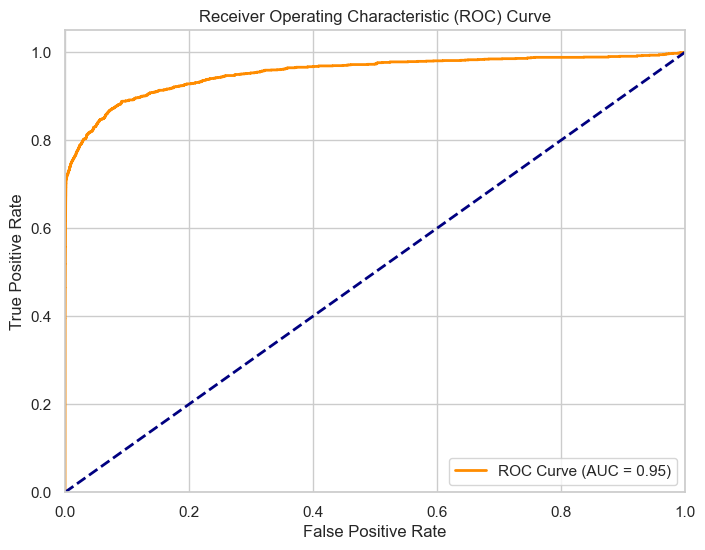

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


* Here are the results from the logistic regression classifier trained on the balanced dataset:

* Accuracy: 99.72%
* ROC AUC: 0.95
* Precision (for Fraudulent transactions): 0.53
* Recall (for Fraudulent transactions): 0.71
* F1-score (for Fraudulent transactions): 0.61
- Logistic Regression achieves high accuracy and ROC AUC, which means the model's overall reliability in classifying transactions is good. However, in fraud detection, where fraudulent transactions are intermingled with non-fraudulent ones, the balance between precision and recall often carries more weight than mere accuracy.

- The recall is 0.71, indicating that the model can detect 71% of fraudulent activities. This is not ideal. In fraud detection, a high recall is critical to ensure that fewer fraudulent transactions go undetected.

- The precision is 0.53, which means that for every 100 transactions the model predicts as fraudulent, only 53 of them are genuinely fraudulent. A lower precision implies that a higher number of legitimate transactions are incorrectly flagged.

- The F1-score is reflecting the trade-off in fraud detection between capturing real fraudulent activities and minimizing false alarms. Since this is baseline model, a score of 0.6 indicates that there is room for improvement.

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00    552439
        True       0.97      0.78      0.86      1643

    accuracy                           1.00    554082
   macro avg       0.98      0.89      0.93    554082
weighted avg       1.00      1.00      1.00    554082

Confusion Matrix:
 [[552394     45]
 [   365   1278]]
ROC AUC: 0.9922328590552356


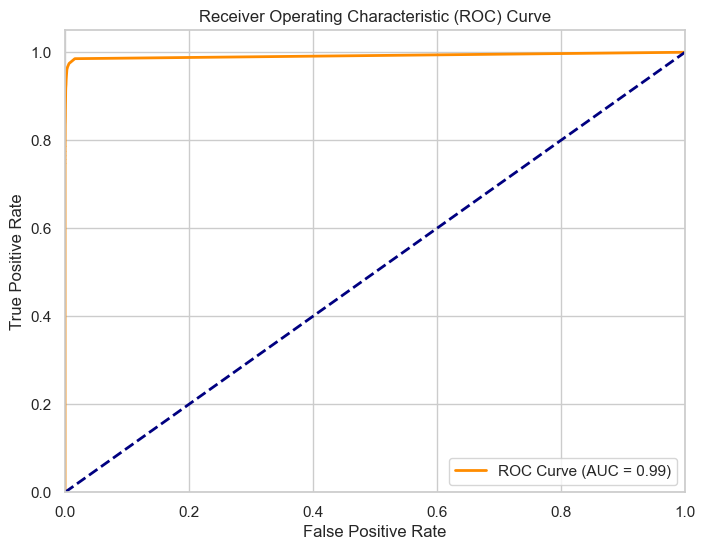

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Create and fit a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Generate predictions on the test set
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Print a classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

# Create and display a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC:", roc_auc)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Over Sampling and Under Sampling
### Class imbalance in Classification

* There are two ways to balance classes - by increasing the smaller class with random duplication, or by decreasing the larger class by randomly removing observations.

#### SMOTE | Overcoming Class Imbalance Problem Using SMOTE

* SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling.



In [25]:
from imblearn.over_sampling import SMOTE

# Instantiate the SMOTE object
over_sample = SMOTE(random_state=42)

# Perform oversampling
X_train_sm, y_train_sm = over_sample.fit_resample(X_train, y_train)

In [26]:
print(sum(y_train_sm == 1), '- positive class')
print(sum(y_train_sm == 0), '- negative class')

2209757 - positive class
2209757 - negative class


In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

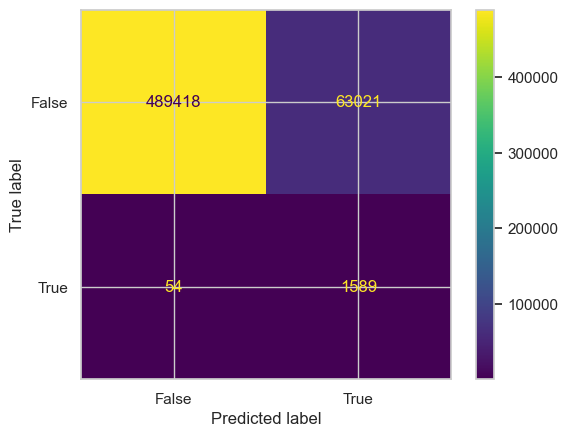

In [28]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_sm,y_train_sm)
lr_prediction=lr_model.predict(X_test)
cm_lr = confusion_matrix(y_test, lr_prediction, labels=lr_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=lr_model.classes_)
disp.plot()
plt.show()

Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.89      0.94    552439
        True       0.02      0.97      0.05      1643

    accuracy                           0.89    554082
   macro avg       0.51      0.93      0.49    554082
weighted avg       1.00      0.89      0.94    554082



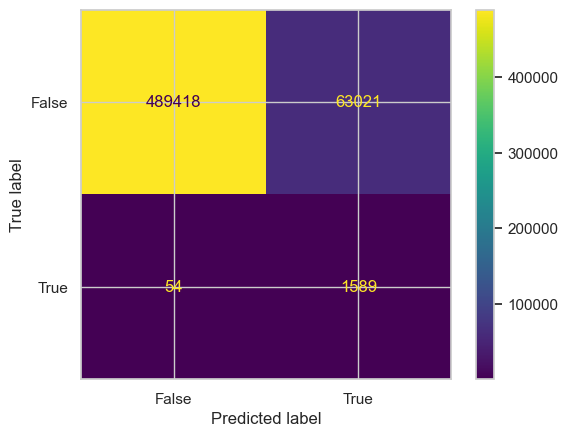

In [29]:
from sklearn.metrics import classification_report

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_sm, y_train_sm)
lr_prediction = lr_model.predict(X_test)

# Calculate and print the classification report
classification_rep = classification_report(y_test, lr_prediction)

print("Classification Report:\n", classification_rep)

# Plot the confusion matrix
cm_lr = confusion_matrix(y_test, lr_prediction, labels=lr_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=lr_model.classes_)
disp.plot()
plt.show()


* Using SMOTE has made the Logistic Regression model more sensitive to the minority class (in this case 'Fraud' = 1), leading to a significant increase in recall for fraudulent transactions. This model is now better at catching most of the fraudulent activities. However, this comes at the cost of reduced precision. The trade-off between Precision and Recall has now become clearer.

Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00    552439
        True       0.64      0.95      0.76      1643

    accuracy                           1.00    554082
   macro avg       0.82      0.98      0.88    554082
weighted avg       1.00      1.00      1.00    554082

Confusion Matrix:
 [[551550    889]
 [    78   1565]]
ROC AUC: 0.9981372478986913


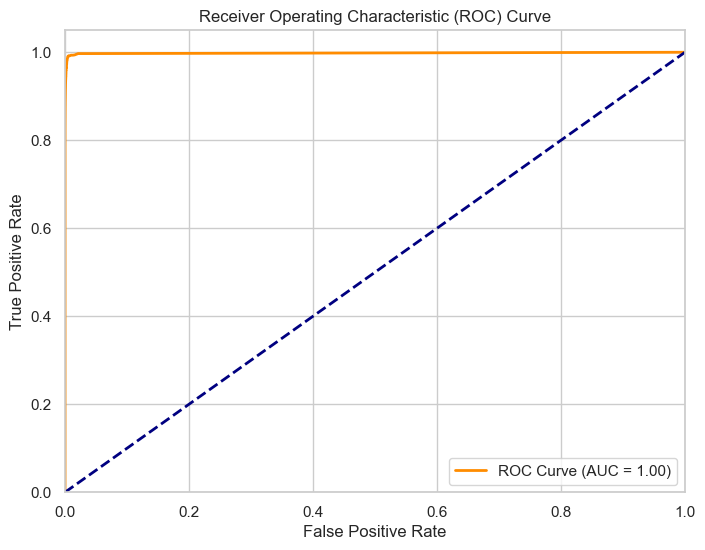

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Instantiate the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the model on the oversampled training data
rf_model.fit(X_train_sm, y_train_sm)

# Generate predictions on the test set
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Print a classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

# Create and display a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC:", roc_auc)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# K nearest neighbour

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, auc, precision_recall_curve
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss, brier_score_loss, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import datetime
from sklearn.pipeline import Pipeline

In [32]:
scaler = StandardScaler()
Xsc_train = scaler.fit_transform(X_train_sm)
Xsc_test = scaler.transform(X_test)

In [33]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(Xsc_train, y_train_sm)
knn_prediction = knn_model.predict(Xsc_test)
knn_prob = knn_model.predict_proba(Xsc_test)

In [34]:
# Calculate accuracy
accuracy = accuracy_score(y_test, knn_prediction)
print("Accuracy:", accuracy)

# Generate and print the classification report
classification_rep = classification_report(y_test, knn_prediction)
print("Classification Report:\n", classification_rep)

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, knn_prob[:, 1])
print("ROC AUC:", roc_auc)

Accuracy: 0.9929486971242524
Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.99      1.00    552439
        True       0.29      0.92      0.44      1643

    accuracy                           0.99    554082
   macro avg       0.64      0.96      0.72    554082
weighted avg       1.00      0.99      0.99    554082

ROC AUC: 0.9646248723900223
